# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

In [33]:
# Import pandas library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [34]:
# Load the data from the file NBA_players_stats.csv using pandas library.
file_path = "NBA_players_stats.csv"
data = pd.read_csv(file_path, sep=',', decimal='.')
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [35]:
data['Pos'].value_counts()

SG        117
PF        102
C          98
PG         92
SF         83
 PG         3
SG          3
C           2
sg          1
PFa         1
pg          1
 SF         1
Pg          1
SF-PF       1
Sf          1
SGa         1
PG-SG       1
 SG         1
SF.         1
PF          1
Name: Pos, dtype: int64

In [36]:
# Clean the data
data['Pos'] = data['Pos'].str.strip()
data['Pos'] = data['Pos'].str.upper()
#data['Pos'].value_counts()

data['Pos'] = data['Pos'].str.replace("SGA", "SG")
data['Pos'] = data['Pos'].str.replace("PFA", "PF")
data['Pos'] = data['Pos'].str.replace("SF.", "SF")
data['Pos'] = data['Pos'].str.replace("SFPF", "SF-PF")
#data['Pos'].value_counts()

data['Age'] = data['Age'].abs()
data['Age'] = data['Age'].replace(280, 28)
#data['Age'].sort_values()

data['Tm'] = data['Tm'].str.strip()
data['Tm'] = data['Tm'].str.upper()
data['Tm'] = data['Tm'].str.replace("H0U", "HOU")
#data['Tm'].value_counts()

#print(data.loc[data['PTS'] != (3 * data['3P'] + 2 * data['2P'] + data['FT'])][['Player','2P', '3P', 'PTS']])
data['PTS'] = data['PTS'].replace(20000, 2)
data['PTS'] = data['PTS'].replace(28800, 288)


#data.iloc[1]

In [37]:
#before groupby
#print(data['Player'].value_counts().sort_values().tail(15))

print(data[['Player','Rk','Pos','Tm']].loc[data['Player'] == 'James Harden'])
#James Harden
#Rodions Kurucs

           Player   Rk    Pos   Tm
183  James Harden  182  PG-SG  TOT
184  James Harden  182     SG  HOU
185  James Harden  182     PG  BRK


In [38]:
#after groupby
#print(data['Player'].value_counts().sort_values().tail(15))

#print(data['Tm']['Taurean Prince'])
#James Harden
#Rodions Kurucs

In [39]:
def returnfirst(x) :
    return x.values[0]

def returnlatest(x) :
    return x.values[0]

def returnlongest(x) :
    return x.values[0]


#Grouping players together
data = data.groupby('Player').agg({
'Rk'      : returnfirst,
'Pos'     : returnfirst,
'Age'     : returnfirst,
'Tm'      : returnfirst,
'G'       : np.sum,
'GS'      : np.sum,
'MP'      : np.sum,
'FG'      : np.sum,
'FGA'     : np.sum,
'FG%'     : np.average,
'3P'      : np.sum,
'3PA'     : np.sum,
'3P%'     : np.average,
'2P'      : np.sum,
'2PA'     : np.sum,
'2P%'     : np.average,
'FT'      : np.sum,
'FTA'     : np.sum,
'FT%'     : np.average,
'ORB'     : np.sum,
'DRB'     : np.sum,
'TRB'     : np.sum,
'AST'     : np.sum,
'STL'     : np.sum,
'BLK'     : np.sum,
'TOV'     : np.sum,
'PF'      : np.sum,
'PTS'     : np.sum,
})

#data.loc["James Harden"]

In [40]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
Please replace XXXXX with your dataframe variable.
"""
data.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

fig 1.1

Top 5 NBA player points

                 Rk Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...    FT%  \
Player                                                            ...          
Delon Wright    488  SG   28  DET  29  24   848  110  235  0.468  ...  0.785   
Thaddeus Young  489  PF   32  CHI  30   0   760  167  274  0.609  ...  0.500   
Trae Young      490  PG   22  ATL  34  34  1182  262  610  0.430  ...  0.878   
Cody Zeller     491   C   28  CHO  18  15   421   73  142  0.514  ...  0.758   
Ivica Zubac     492   C   23  LAC  38   1   753  120  182  0.659  ...  0.826   

                ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS  
Player                                                       
Delon Wright     32  101  133  141   42   15   35   32  310  
Thaddeus Young   71  105  176  131   42   17   56   81  362  
Trae Young       25  117  142  321   30    8  149   70  897  
Cody Zeller      46   90  136   44   11   11   20   47  174  
Ivica Zubac      90  176  266   43   14   30   39  228  311  

[5 r

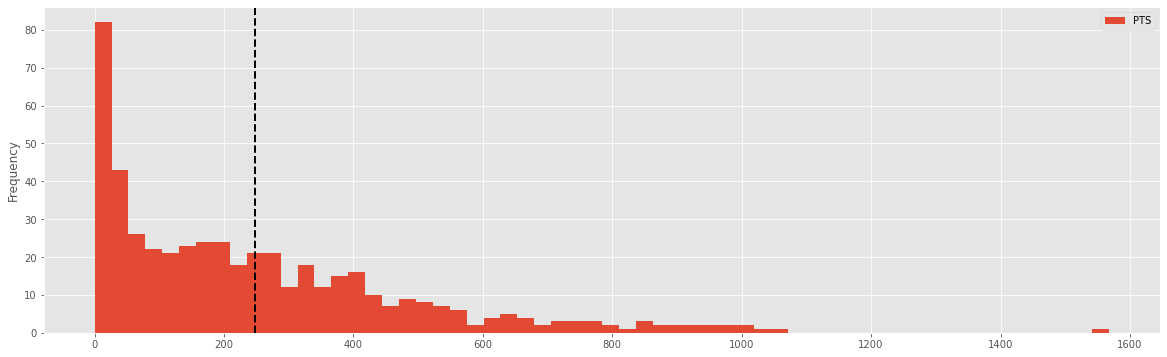

In [41]:
#Total PTS of everyone
data.sort_values(by=['PTS'], ascending=False).plot.hist(y="PTS", figsize=(20,6), bins=60)
plt.axvline(data['PTS'].mean(), color='k', linestyle='dashed', linewidth=2)
#data.sort_values(by=['PTS'], ascending=False).boxplot(column="PTS", figsize=(8,14))
print(data.sort_values(by=['Rk']).tail())

<AxesSubplot:title={'center':'Scoring composition'}, ylabel='averages'>

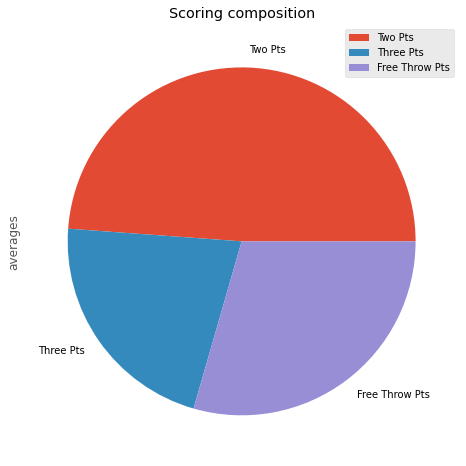

In [42]:
averagethree = round(data.sort_values(by=['PTS'], ascending=False)["3P"].mean())
averagetwo = round(data.sort_values(by=['PTS'], ascending=False)["2P"].mean())
averagefree = round(data.sort_values(by=['PTS'], ascending=False)["FT"].mean())

allavgs = pd.DataFrame({'averages': [averagetwo, averagethree, averagefree]},
                       index=['Two Pts', 'Three Pts', 'Free Throw Pts'])

allavgs.plot.pie(y='averages', figsize=(8,8), title='Scoring composition')

<AxesSubplot:title={'center':'Points composition'}, ylabel='averages'>

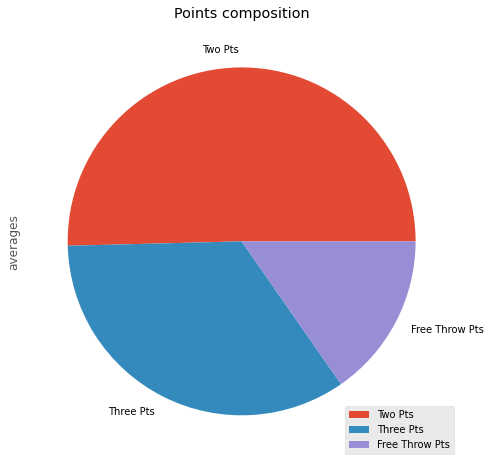

In [43]:
averagethree = round(3 * data.sort_values(by=['PTS'], ascending=False)["3P"].mean())
averagetwo = round(2 * data.sort_values(by=['PTS'], ascending=False)["2P"].mean())
averagefree = round(data.sort_values(by=['PTS'], ascending=False)["FT"].mean())

allavgs = pd.DataFrame({'averages': [averagetwo, averagethree, averagefree]},
                       index=['Two Pts', 'Three Pts', 'Free Throw Pts'])

allavgs.plot.pie(y='averages', figsize=(8,8), title='Points composition')

<AxesSubplot:xlabel='Player'>

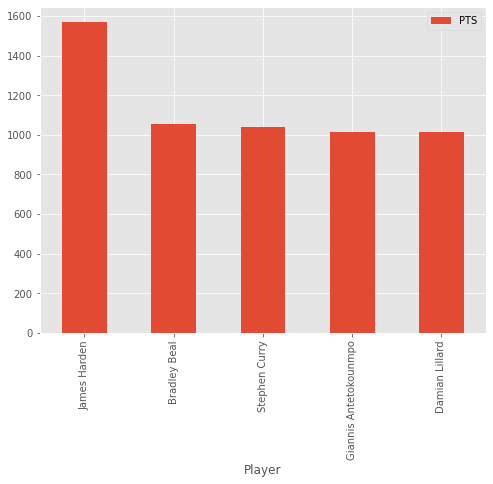

In [44]:
#Total PTS of top 5
data.sort_values(by=['PTS'], ascending=False).head(5).plot.bar(y="PTS", figsize=(8,6))

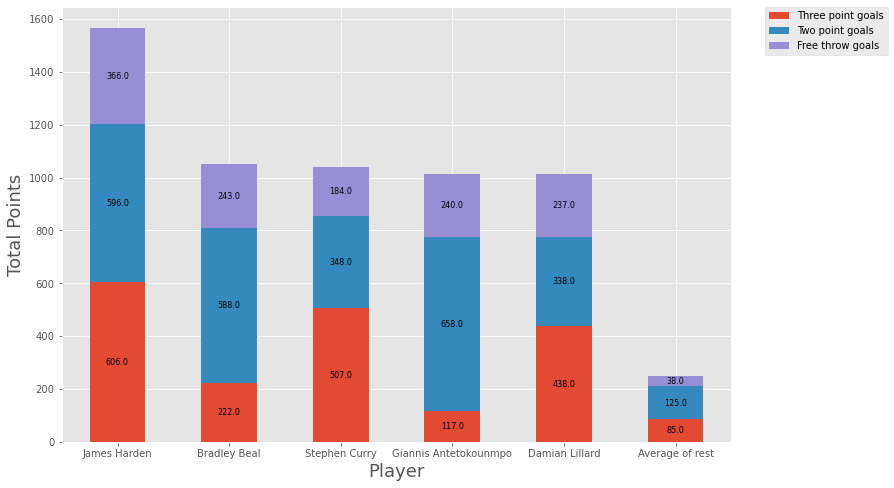

In [45]:
averagethree = round(3 * data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["3P"].mean())
averagetwo = round(2 * data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["2P"].mean())
averagefree = round(data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["FT"].mean())

three = 3 * data.sort_values(by=['PTS'], ascending=False).head(5)["3P"]
two = 2 * data.sort_values(by=['PTS'], ascending=False).head(5)["2P"]
free = data.sort_values(by=['PTS'], ascending=False).head(5)["FT"]

three.loc["Average of rest"] = averagethree
two.loc["Average of rest"] =  averagetwo
free.loc["Average of rest"] =  averagefree

plotdata = pd.DataFrame({ 'Three point goals' : three, 'Two point goals' : two, 'Free throw goals' : free })

plt.style.use('ggplot')

ax = plotdata.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height}'  # f'{height:.2f}' to format decimal values

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_ylabel("Total Points", fontsize=18)
ax.set_xlabel("Player", fontsize=18)
plt.show()

In [46]:
#data.sort_values(by=['PTS'], ascending=False).head(5)

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.

3P% = 3P / 3PA

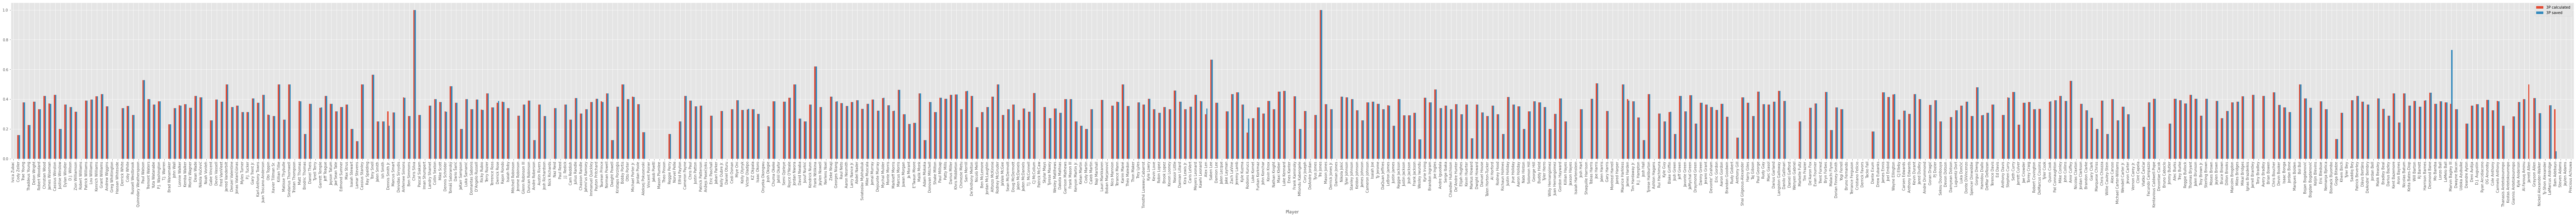

In [47]:
threep = data.sort_values(by=['Rk'], ascending=False)["3P"]
threeppercent = data.sort_values(by=['Rk'], ascending=False)["3PA"]
threep = threep.div(threeppercent)

# calculated3Ppercent = data.mul(threep, threeppercent)
saved3Ppercent = data.sort_values(by=['Rk'], ascending=False)["3P%"]

plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent})
plt.style.use('ggplot')

bx = plotdata.plot(stacked=False, kind='bar', figsize=(128, 8), rot='vertical')

First 25 records as the graph including every player is too difficult to read

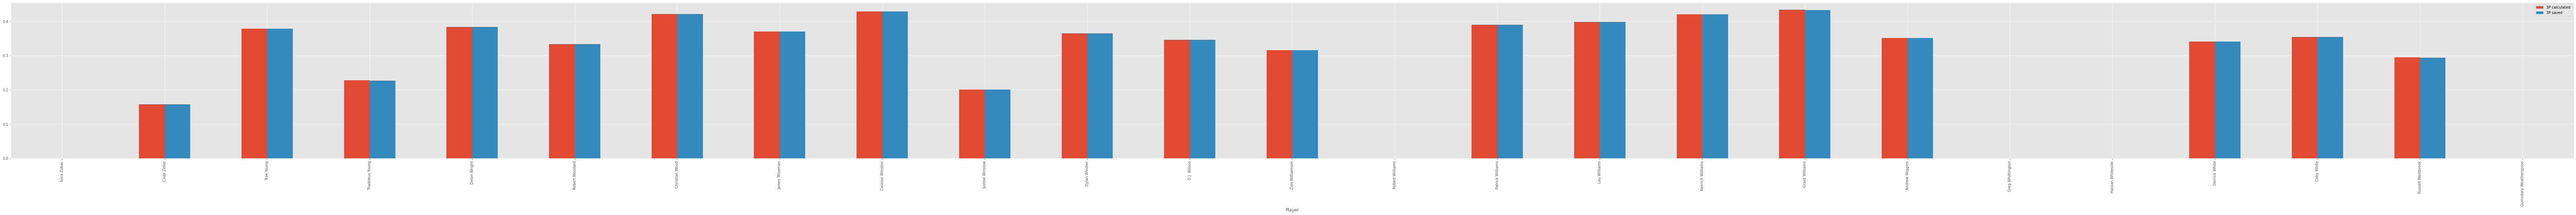

In [48]:
plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent}).head(25)
plt.style.use('ggplot')
bx = plotdata.plot(stacked=False, kind='bar', figsize=(128, 8), rot='vertical')

The left bar is the calculated 3P% using the values of the 3P and 3PA column using the equation 3P% = 3P / 3PA

The right bar is the 3P% column, therefore any grouped bar that are of different heights mean that there is an error.

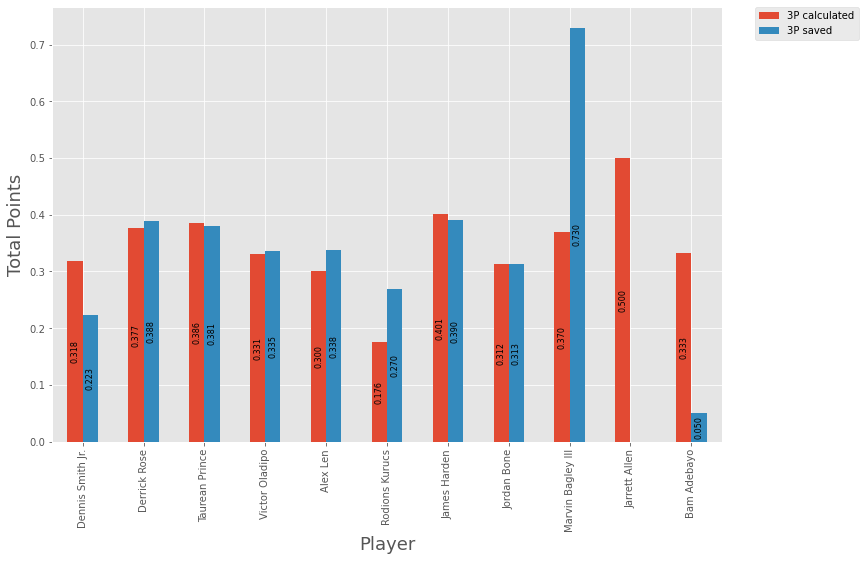

In [49]:
#gets all the columns where
is_incorrect =  round(data['3P%'],3) != round(data['3P'].div(data['3PA']),3)
newdata = data[is_incorrect]

#removes columns where the players 3P% are both equal to either 0 or NaN.
both_nan = False == (newdata['3P%'].isna()) & (newdata['3P'].div(newdata['3PA']).isna() | (newdata['3P'].div(newdata['3PA']) == 0))
newdata = newdata[both_nan]

threep = newdata.sort_values(by=['Rk'], ascending=False)["3P"]
threeppercent = newdata.sort_values(by=['Rk'], ascending=False)["3PA"]
threep = threep.div(threeppercent)
saved3Ppercent = newdata.sort_values(by=['Rk'], ascending=False)["3P%"]

plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent})

plt.style.use('ggplot')

ax = plotdata.plot(stacked=False, kind='bar', figsize=(12, 8), rot='vertical')

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height:.3f}'

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, rotation=90)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_ylabel("Total Points", fontsize=18)
ax.set_xlabel("Player", fontsize=18)
plt.show()
#bx = plotdata.plot(stacked=False, kind='bar', figsize=(24, 8), rot='vertical')

#print(data.loc['Damian Jones'])

The above graph is all the players where the calculated 3P% is not equal to the actual 3P% in the data. Therefore we can see exactly where there has been an error in the 3P% column.

In [50]:
#Fixing the data
data['3P%'] = data['3P'].div(data['3PA'])

#Using the above sorting again to pick incorrect data
is_incorrect =  round(data['3P%'],3) != round(data['3P'].div(data['3PA']),3)
newdata = data[is_incorrect]
both_nan = False == (newdata['3P%'].isna()) & (newdata['3P'].div(newdata['3PA']).isna() | (newdata['3P'].div(newdata['3PA']) == 0))
newdata = newdata[both_nan]

#we can see that now there are no players with an incorrect 3P%.
newdata

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,


The above table shows that there are now zero players where the 3P% does not match the calculated 3P%.

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.

#ideas
#total points over games (pts / games)
#

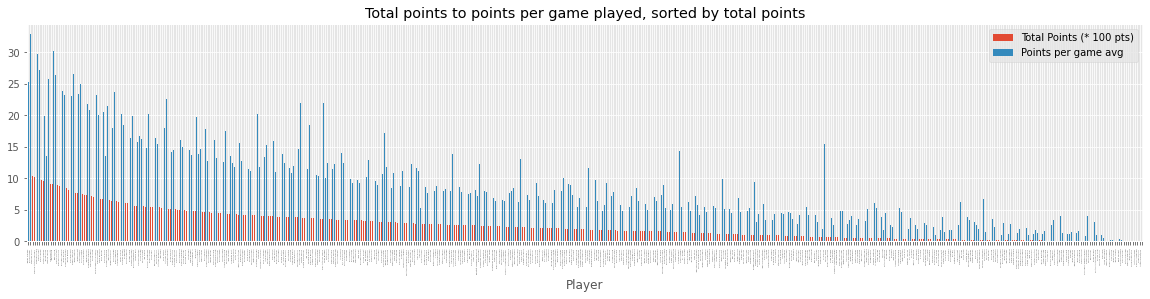

In [110]:
totalpoints = data['PTS'] / 100
pointspergame = data['PTS'].div(data['G'])
#pointsperminute = data['PTS'].div(data['MP'])
taskthreedata = pd.DataFrame({'Total Points (* 100 pts)' : totalpoints,'Points per game avg' : pointspergame})
#taskthreedata.sort_values(by='Total Points', ascending=False).head(20).plot.bar(title='Points per game', y="Points per game avg", figsize=(14,6))

plt.style.use('ggplot')

ax = taskthreedata.sort_values(by='Total Points (* 100 pts)', ascending=False).plot(title='Total points to points per game played, sorted by total points',stacked=False, kind='bar', figsize=(20, 4), rot='vertical')
for item in (ax.get_xticklabels() ):
    item.set_fontsize(2)

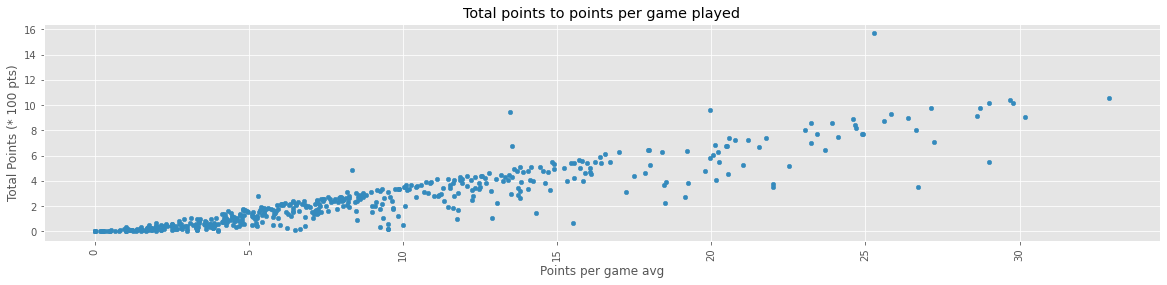

In [125]:
ax = taskthreedata.sort_values(by='Total Points (* 100 pts)', ascending=False).plot.scatter(x='Points per game avg',y='Total Points (* 100 pts)',title='Total points to points per game played', figsize=(20, 4), rot='vertical')

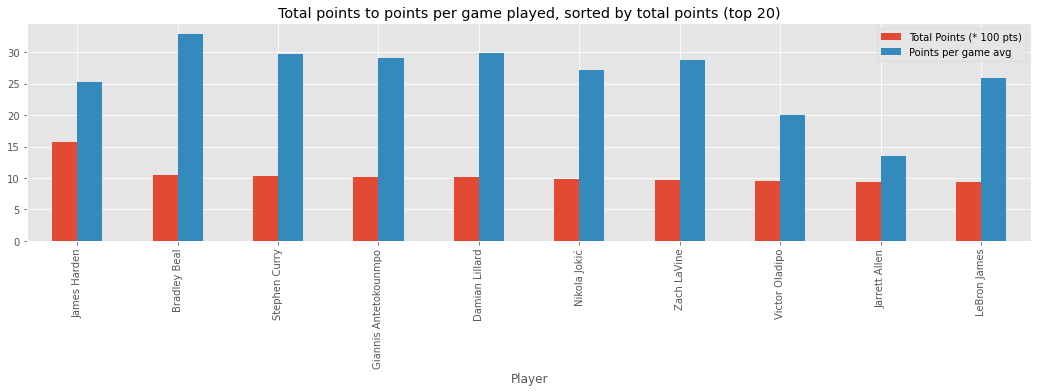

In [115]:
ax = taskthreedata.sort_values(by='Total Points (* 100 pts)', ascending=False).head(10).plot(title='Total points to points per game played, sorted by total points (top 20)',stacked=False, kind='bar', figsize=(18, 4), rot='vertical')

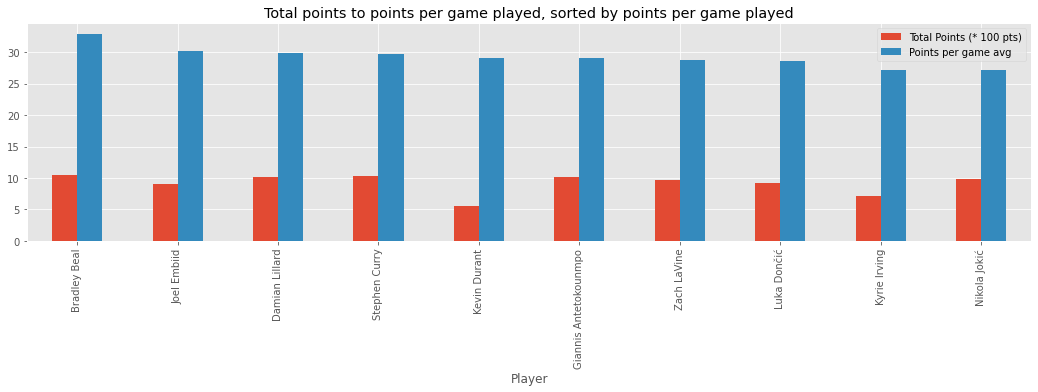

In [114]:
ax = taskthreedata.sort_values(by='Points per game avg', ascending=False).head(10).plot(title='Total points to points per game played, sorted by points per game played',stacked=False, kind='bar', figsize=(18, 4), rot='vertical')

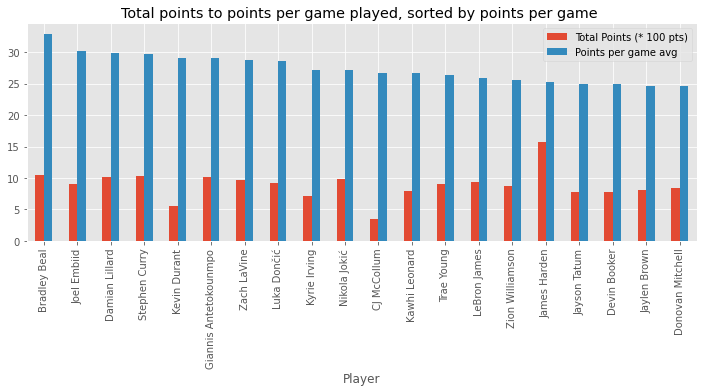

In [113]:
#ax = taskthreedata.sort_values(by='Points per game avg', ascending=False).head(10).plot(title='Total points to points per game played, sorted by points per game ', stacked=False, kind='bar', figsize=(12, 4), rot='vertical')

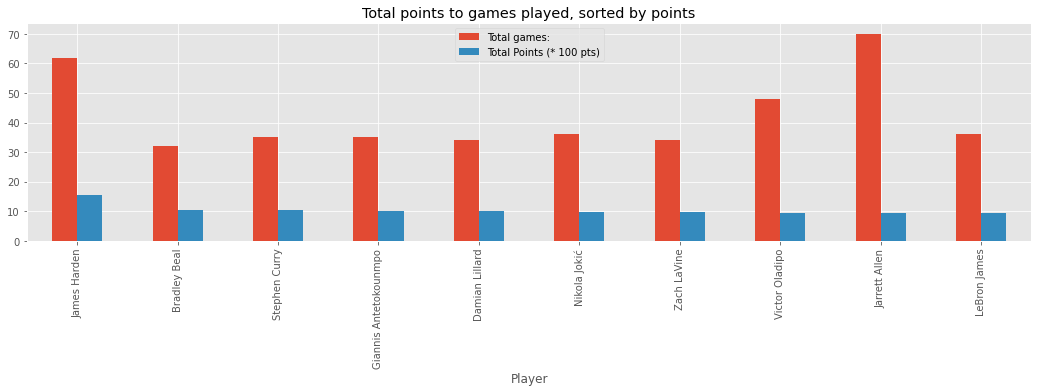

In [118]:
totalgames = pd.DataFrame({"Total games: " : data['G'], "Total Points (* 100 pts)" : totalpoints})
ax = totalgames.sort_values(by='Total Points (* 100 pts)', ascending=False).head(10).plot(title='Total points to games played, sorted by points',stacked=False, kind='bar', figsize=(18, 4), rot='vertical')